# Machine Learning Lab Project

Submitted by<br>Amrit Majumder - 18MCMI01<br>Delton M Antony - 18MCMI05<br>Ashutosh Mahawar - 18MCMI23

# Aim

To explore Fact Extraction and Verification data and do EDA and modeling on it.

# Requirements

Python3.7<br>Anaconda 5

Note: As a prerequisite, we have used the extracted data from<br>https://github.com/cdmalon/fever2018-retrieval/tree/90a07fe85b418de5ab62de8eaa2572df0d93f51e
by using<br> $ bash scripts/download-processed-wiki.sh which downloads the 4.1 GB data. Here I am using only titles as input for EDA and classification scraped from the data into csv. Files can be found in the data folder in the root directory of this project.<br>Credits to the github user cdmalon https://github.com/cdmalon

The following notebook is under the assumption that we already have the title dataset scraped by cdmalon (link above)

# Procedure

Reading the data

In [1]:
import pandas as pd
# Fake news
df_onion = pd.read_csv('./data/the_onion.csv')
# Genuine News
df_not_onion = pd.read_csv('./data/not_onion.csv')

In [2]:
fake_dataset = df_onion.rename(index=str, columns={"subreddit": "target"})

In [3]:
fake_dataset = fake_dataset.drop('target', axis=1)

In [4]:
fake_dataset['fake'] = 1

In [5]:
fake_dataset.head()

,Unnamed: 0,author,domain,num_comments,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,1,DisastrousCandy3,theonion.com,3,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,2,SlovenianCat,youtu.be,0,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,3,MyNameIsGriffon,sports.theonion.com,0,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,4,MyNameIsGriffon,theonion.com,0,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


In [6]:
fake_dataset.to_csv('fake_data.csv')

In [7]:
# previewing the genuine news
df_not_onion.head()

,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,drak0bsidian,cnn.com,0,1,nottheonion,1554663925,Suspected rhino poacher is killed by an elepha...
1,1,somefaces,nypost.com,1,1,nottheonion,1554663648,Taliban commander turns himself in to collect ...
2,2,Sombez,nytimes.com,1,1,nottheonion,1554663558,Rhino Poacher Killed by Elephant and Eaten by ...
3,3,Bayou-Maharaja,ktoo.org,0,1,nottheonion,1554662778,Young shoves female reporter on way to Violenc...
4,4,phantommaster1999,buzz.ie,1,1,nottheonion,1554661988,Poacher hunting rhinos trampled to death by el...


In [8]:
# Previewing the shape of the two datasets
genuine_dataset = df_not_onion.drop('subreddit', axis=1)

In [9]:
genuine_dataset['fake'] = 0

In [10]:
genuine_dataset.head()

,Unnamed: 0,author,domain,num_comments,score,timestamp,title,fake
0,0,drak0bsidian,cnn.com,0,1,1554663925,Suspected rhino poacher is killed by an elepha...,0
1,1,somefaces,nypost.com,1,1,1554663648,Taliban commander turns himself in to collect ...,0
2,2,Sombez,nytimes.com,1,1,1554663558,Rhino Poacher Killed by Elephant and Eaten by ...,0
3,3,Bayou-Maharaja,ktoo.org,0,1,1554662778,Young shoves female reporter on way to Violenc...,0
4,4,phantommaster1999,buzz.ie,1,1,1554661988,Poacher hunting rhinos trampled to death by el...,0


In [11]:
genuine_dataset.to_csv('genuine_data.csv')

In [12]:
dataset = fake_dataset.append(genuine_dataset, ignore_index=True)

In [13]:
dataset.head()

,Unnamed: 0,author,domain,num_comments,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,1,DisastrousCandy3,theonion.com,3,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,2,SlovenianCat,youtu.be,0,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,3,MyNameIsGriffon,sports.theonion.com,0,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,4,MyNameIsGriffon,theonion.com,0,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


In [14]:
dataset2 = dataset

In [15]:
dataset2 = dataset2.drop(dataset2.columns[0], axis=1)

In [16]:
dataset2 = dataset2.drop('num_comments', axis=1)

In [17]:
dataset2.head()

,author,domain,score,timestamp,title,fake
0,Kotaay,google.ca,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,DisastrousCandy3,theonion.com,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,SlovenianCat,youtu.be,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,MyNameIsGriffon,sports.theonion.com,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,MyNameIsGriffon,theonion.com,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


In [18]:
dataset2.tail()

,author,domain,score,timestamp,title,fake
29863,Icy9kills,yahoo.com,1,1548378526,Family kicked off of plane because of their bo...,0
29864,EternalTryhard,dw.com,1,1548378483,Russia's Putin and Japan's Abe try to end Worl...,0
29865,MassBurst730,cnn.com,1,1548378466,Daily fried chicken serving linked to 13% high...,0
29866,TriumphantSon,eurogamer.net,1,1548378167,Farming simulator starts up esports with 250k ...,0
29867,treesbark,independent.co.uk,1,1548378009,MARK ZUCKERBERG 'KILLED GOAT WITH LASER GUN AN...,0


In [19]:
dataset2.to_csv('merged_data.csv')

If you are already having the merged_data.csv which I made, you only need to start executing from here. Everything else can be commented out.

In [20]:
dataset = pd.read_csv('merged_data.csv')

In [21]:
dataset.head()

,Unnamed: 0,author,domain,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1554658622,Jack Nicholson Banned From Sitting Courtside A...,1
1,1,DisastrousCandy3,theonion.com,1,1554600149,NicoDerm Introduces New Nicotine Eye Patch,1
2,2,SlovenianCat,youtu.be,1,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...,1
3,3,MyNameIsGriffon,sports.theonion.com,386,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...,1
4,4,MyNameIsGriffon,theonion.com,3,1554501708,House Democrats Formally Request Trump’s Tax R...,1


Cleaning the data

In order to remove bias, we need to clean the data - remove duplicate articles, remove punctuation marks, remove numbers, remove double spaces and make all text lowercase

In [22]:
def clean_data(dataframe):
    # Drop duplicate rows
    dataframe.drop_duplicates(subset='title', inplace=True)
    # Remove punctation
    dataframe['title'] = dataframe['title'].str.replace('[^\w\s]',' ')
    # Remove numbers 
    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')
    # Make sure any double-spaces are single 
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    # Transform all text to lowercase
    dataframe['title'] = dataframe['title'].str.lower()
    print("New shape:", dataframe.shape)
    return dataframe.head()

In [23]:
clean_data(dataset)

New shape: (26262, 7)


,Unnamed: 0,author,domain,score,timestamp,title,fake
0,0,Kotaay,google.ca,1,1554658622,jack nicholson banned from sitting courtside a...,1
1,1,DisastrousCandy3,theonion.com,1,1554600149,nicoderm introduces new nicotine eye patch,1
2,2,SlovenianCat,youtu.be,1,1554585700,last bastion of u s economy succumbs to pancre...,1
3,3,MyNameIsGriffon,sports.theonion.com,386,1554559311,tom izzo calls spartans best team he s ever t...,1
4,4,MyNameIsGriffon,theonion.com,3,1554501708,house democrats formally request trump s tax r...,1


Check for null values

In [24]:
pd.DataFrame([df_onion.isnull().sum()], index=["dataSet"]).T

,dataSet
Unnamed: 0,0
author,0
domain,0
num_comments,0
score,0
subreddit,0
timestamp,0
title,0


There are no null values

# Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Bar Plot Function

In [26]:
def bar_plot(x, y, title, color):    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g
    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)
    # Enable bar values
    totals = []
    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

Most active authors fake news and articles

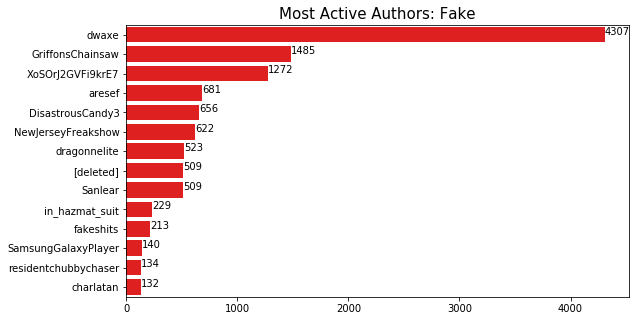

In [27]:
df_fake_authors = fake_dataset['author'].value_counts() 
df_fake_authors = df_fake_authors[df_fake_authors > 100].sort_values(ascending=False)
# Set y values: Authors 
df_fake_authors_index = list(df_fake_authors.index)
# Call function
bar_plot(df_fake_authors.values, df_fake_authors_index, 'Most Active Authors: Fake', 'r')

Most active authors of non fake news and articles

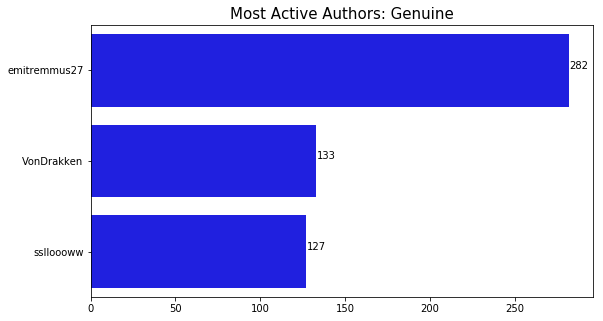

In [28]:
# Set x values: # of posts
df_not_fake_authors = genuine_dataset['author'].value_counts() 
df_not_fake_authors = df_not_fake_authors[df_not_fake_authors > 100].sort_values(ascending=False)

# Set y values: Authors
df_not_fake_authors_index = list(df_not_fake_authors.index)

# Call function
bar_plot(df_not_fake_authors.values, df_not_fake_authors_index, 'Most Active Authors: Genuine','b')


Most referenced domains of Fake news and articles

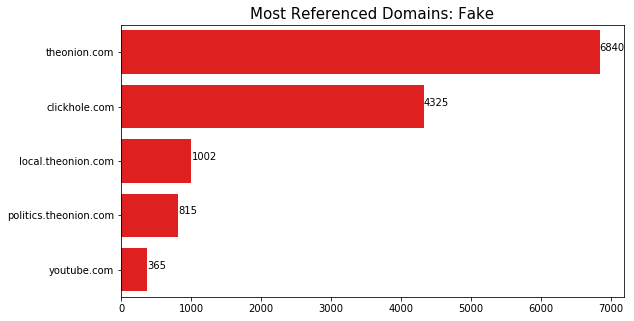

In [29]:
# Set x values: # of posts
df_fake_domain = fake_dataset['domain'].value_counts()
df_fake_domain = df_fake_domain.sort_values(ascending=False).head(5)
# Set y values: Domains
df_fake_domain_index = list(df_fake_domain.index)
# Call function
bar_plot(df_fake_domain.values, df_fake_domain_index, 'Most Referenced Domains: Fake', 'r')

Most referenced domains of genuine news and articles

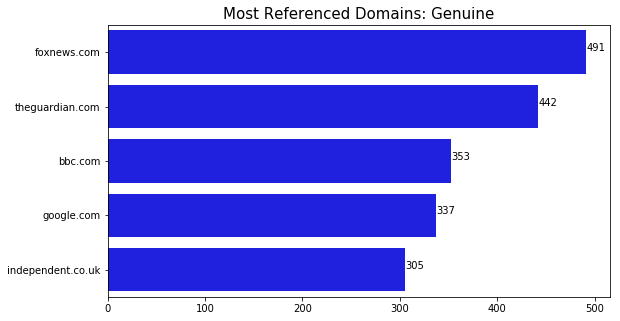

In [30]:
# Set x values: # of posts greater than 100
df_not_fake_domain = genuine_dataset['domain'].value_counts() 
df_not_fake_domain = df_not_fake_domain.sort_values(ascending=False).head(5)
# Set y values: Names of authors 
df_not_fake_domain_index = list(df_not_fake_domain.index)
# Call function
bar_plot(df_not_fake_domain.values, df_not_fake_domain_index, 'Most Referenced Domains: Genuine', 'b')

# Natural Language Processing

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26262 entries, 0 to 29867
Data columns (total 7 columns):
Unnamed: 0    26262 non-null int64
author        26262 non-null object
domain        26262 non-null object
score         26262 non-null int64
timestamp     26262 non-null int64
title         26262 non-null object
fake          26262 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


In [32]:
nlp_dataset = dataset.drop(['author', 'domain', 'score', 'timestamp'], axis=1)

In [33]:
nlp_dataset = nlp_dataset.drop(nlp_dataset.columns[0], axis=1)

In [34]:
nlp_dataset = nlp_dataset.reset_index(drop=True)
nlp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26262 entries, 0 to 26261
Data columns (total 2 columns):
title    26262 non-null object
fake     26262 non-null int64
dtypes: int64(1), object(1)
memory usage: 410.4+ KB


Applying count vectorizer

In [35]:
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

I have no other choice but to drop a lot of data as my computer is not supporting this size which is meant to be run on supercomputers. See Line 6 of the following code segment.

Count Vectorize when fake is 1

In [36]:
mask_on = dataset['fake'] == 1
df_fake_titles = dataset[mask_on]['title']
# Im only taking first 2000 entries
# Else it gives memory error
# As this project is meant to be run on a damn cluster
df_fake_titles = df_fake_titles.head(5000) # dropping the rest of the bazillion points of data
# Instantiate a CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')
# Fit and transform the vectorizer on our corpus
fake_cvec = cv1.fit_transform(df_fake_titles)
# Convert fake_cvec into a DataFrame
fake_cvec_df = pd.DataFrame(fake_cvec.toarray(),
                            columns=cv1.get_feature_names())

# Inspect head of Fake Titles cvec
print(fake_cvec_df.shape)

(5000, 11276)


Count Vectorize when fake is 0

In [37]:
# Set variables to show Genuine Titles
mask_no = dataset['fake'] == 0
df_not_fake_titles = dataset[mask_no]['title']
# Again, a conventional laptop doesnt support np.toarray() thousands of text data at once
# Hence, dropping a few thousand more of the data
df_not_fake_titles = df_not_fake_titles.head(5000) # Again, I dont have a supercomputer and I'm lazy to do it even if I had one
# Instantiate a CountVectorizer
cv2 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
not_fake_cvec = cv2.fit_transform(df_not_fake_titles)

# Convert fake_cvec into a DataFrame
not_fake_cvec_df = pd.DataFrame(not_fake_cvec.toarray(),
                                columns=cv2.get_feature_names())

# Inspect head of Not fake Titles cvec
print(not_fake_cvec_df.shape)

(5000, 8955)


Fake: Top 5 unigrams

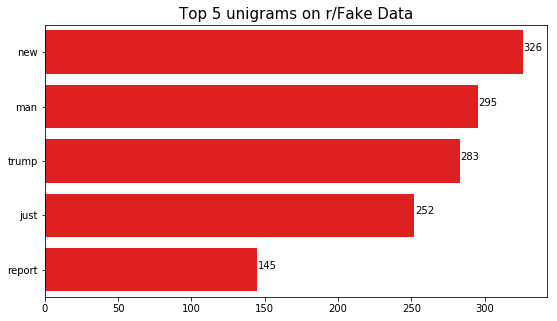

In [38]:
# Set up variables to contain top 5 most used words in Fake
fake_wc = fake_cvec_df.sum(axis = 0)
fake_top_5 = fake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(fake_top_5.values, fake_top_5.index, 'Top 5 unigrams on r/Fake Data','r')

Genuine: Top 5 unigrams

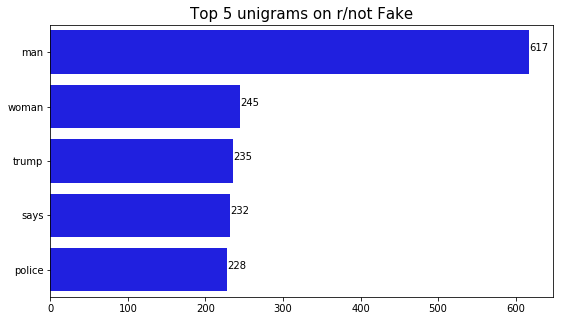

In [39]:
# Set up variables to contain top 5 most used words in Fake
nfake_wc = not_fake_cvec_df.sum(axis = 0)
nfake_top_5 = nfake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(nfake_top_5.values, nfake_top_5.index, 'Top 5 unigrams on r/not Fake','b')

Common Unigrams

In [40]:
not_fake_5_set = set(nfake_top_5.index)
fake_5_set = set(fake_top_5.index)

# Return common words
common_unigrams = fake_5_set.intersection(not_fake_5_set)
common_unigrams

{'man', 'trump'}

Now set ngram range as 2 to get most used phrase of word length 2

Count vectorize when fake = 1`

In [41]:
# Set variables to show Fake Titles
mask = dataset['fake'] == 1
df_fake_titles = dataset[mask]['title']
df_fake_titles = df_fake_titles.head(2500)

# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
fake_cvec = cv.fit_transform(df_fake_titles)

# Convert fake_cvec into a DataFrame
fake_cvec_df = pd.DataFrame(fake_cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect head of Fake Titles cvec
print(fake_cvec_df.shape)

(2500, 15869)


Count Vectorize when fake = 0

In [42]:
# Set variables to show Genuine Titles
mask = dataset['fake'] == 0
df_not_fake_titles = dataset[mask]['title']
df_not_fake_titles = df_not_fake_titles.head(2500)
# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))
# Fit and transform the vectorizer on our corpus
not_fake_cvec = cv.fit_transform(df_not_fake_titles)
# Convert fake_cvec into a DataFrame
not_fake_cvec_df = pd.DataFrame(not_fake_cvec.toarray(),
                                columns=cv.get_feature_names())
# Inspect head of Not Fake Titles cvec
print(not_fake_cvec_df.shape)

(2500, 13097)


Top 5 Fake bigrams

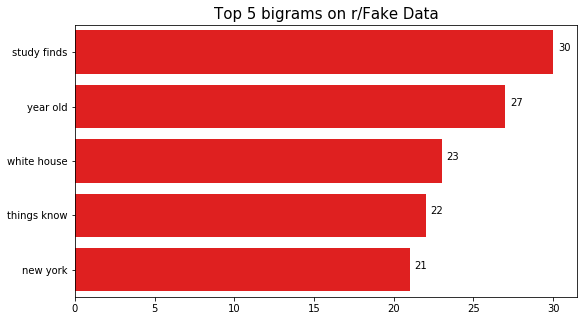

In [43]:
fake_wc = fake_cvec_df.sum(axis = 0)
fake_top_5 = fake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(fake_top_5.values, fake_top_5.index, 'Top 5 bigrams on r/Fake Data', 'r')

Top 5 Genuine Bigrams

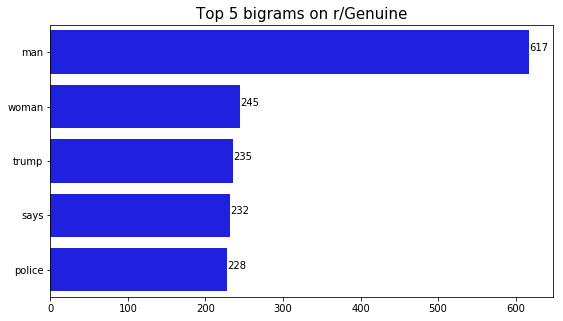

In [45]:
n_wc = not_fake_cvec_df.sum(axis = 0)
nfake_top_5 = nfake_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(nfake_top_5.values, nfake_top_5.index, 'Top 5 bigrams on r/Genuine','b')


Common bigrams between fake and non fake

In [47]:
not_fake_5_list = set(nfake_top_5.index)
fake_5_list = set(fake_top_5.index)

# Return common words
common_bigrams = fake_5_list.intersection(not_fake_5_list)
common_bigrams = {'year old'}
common_bigrams

{'year old'}

Take out 'man', 'new', 'old', 'people', 'say', 'trump', 'woman', 'year' from dataset as they can be seen in both fake and genuine

To do that, create custom stopo words

In [48]:
# Create lists 
custom = stop_words.ENGLISH_STOP_WORDS
custom = list(custom)
common_unigrams = list(common_unigrams)
common_bigrams = list(common_bigrams)

# Append unigrams to list 
for i in common_unigrams:
    custom.append(i)

    
# Append bigrams to list 
for i in common_bigrams:
    split_words = i.split(" ")
    for word in split_words:
        custom.append(word)

# Modeling

Set up X and y

In [49]:
X = dataset['title']
y = dataset['fake']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    stratify=y)

Using Multinomial Naive Bayes

In [54]:
# MNB is the one giving the best result, hence only including it hereb
from sklearn.naive_bayes import MultinomialNB
#Instantiate the classifier and vectorizer
nb = MultinomialNB(alpha = 0.36) # alpha is the smoothing parameter
# alpha was determined using gridsearchcv
# code not including here as I did it once. It takes time.
# alpha was the only parameter deemed tweaking after gridSearchCV
cvec = CountVectorizer(ngram_range= (1, 3))
# Fit and transform the vectorizor
cvec.fit(X_train)
Xcvec_train = cvec.transform(X_train)
Xcvec_test = cvec.transform(X_test)
# Fit the classifier
nb.fit(Xcvec_train,y_train)
# Create the predictions for Y training data
preds = nb.predict(Xcvec_test)
print(nb.score(Xcvec_test, y_test))

0.8933901918976546


Evaluating the model using evaluation function
Code taken from
https://github.com/deltonmyalil/HeartDiseasePrediction/blob/master/HeartDiseasePrediction/HeartDiseasePredictionNotebook.ipynb

In [59]:
# Evaluating the results
# First, lets make a function to evaluate the results of prediction
from sklearn.metrics import confusion_matrix
# Precision = tp/(tp+fp) ie out of all predicted positive, how many actually have heartDisease
from sklearn.metrics import precision_score
# Recall = tp/(tp+fn) ie out of all heart disease patients, how many are detected by our MLalgo
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

def evaluateModel(yTrue, yPredicted, modelName):
    print("=====================================================")
    print("Result of prediction for the model - ", modelName)
    confMatrix = confusion_matrix(yTrue, yPredicted)
    print("Confusion Matrix")
    print(confMatrix)
    precision = round(precision_score(yTrue, yPredicted), 4)
    print("Precision is ", precision)
    print("Out of all predicted as Heart Patients, {} percent actually have Heart Disease".format(precision*100))
    recall = round(recall_score(yTrue, yPredicted), 4)
    print("Recall is ", recall)
    print("Out of all actual heart patients, {0} is able to detect {1} percent of them".format(modelName, recall*100))
    print("Drawing the ROC")
    fpr, tpr, thresholds = roc_curve(yPredicted, yTrue)
    roc_auc = round(auc(fpr, tpr), 3) # I only need three decimal places
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label="{0}, area={1}".format(modelName, roc_auc))
    plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--') # Apparently this is line between (0,0) and (1,1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Flase Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic for {}".format(modelName))
    plt.legend(loc="lower right")
    plt.show()
    print("=====================================================")

Result of prediction for the model -  MultinomialNB
Confusion Matrix
[[2688  330]
 [ 370 3178]]
Precision is  0.9059
Out of all predicted as Heart Patients, 90.59 percent actually have Heart Disease
Recall is  0.8957
Out of all actual heart patients, MultinomialNB is able to detect 89.57000000000001 percent of them
Drawing the ROC


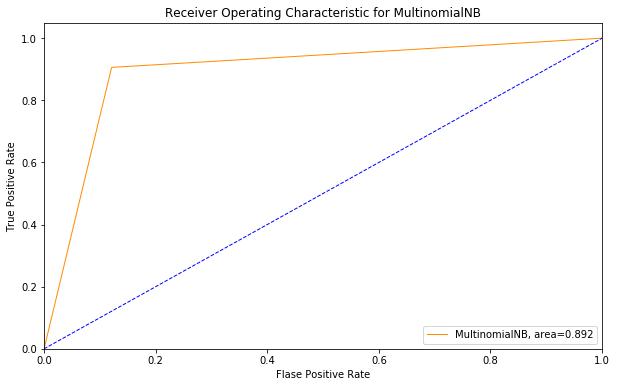

In [60]:
evaluateModel(y_test, preds, 'MultinomialNB')

# Conclusion

We were able to extract data (a very small part from the 4.1 GB file which is still growing) using a third person API created by github user cdmalon and could perform EDA on them to find out which words (unigrams and digrams) were most common in fake and genuine reports and articles. We were able to train multiple models, of which Multinomial Naive Bayes showed the best AUC.<br>
The chief drawback was that traditional computers are not fit to work with the dataset as a whole. Hence we did EDA and modeling on the title only. Moreover, while performing EDA and subsequent modeling, we had to drop a large chunk of the data further to make np.toarray() function work inside the count vectorize function.

# References

https://github.com/cdmalon/fever2018-retrieval/tree/90a07fe85b418de5ab62de8eaa2572df0d93f51e
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
www.fever.ai
https://github.com/deltonmyalil/HeartDiseasePrediction